<a href="https://colab.research.google.com/github/peppefdf/Generate_stops/blob/main/Generate_stops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


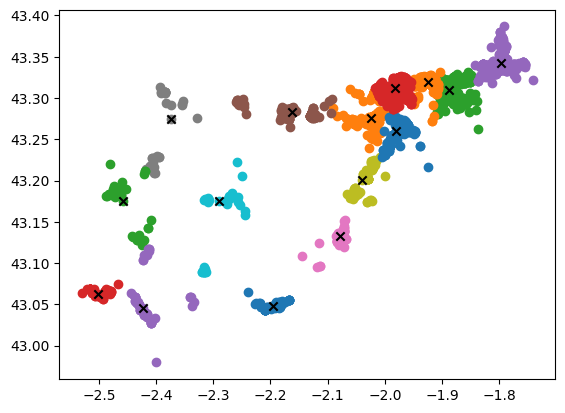

Closest stop for cluster  0 :
-2.179219 43.0526264

Closest stop for cluster  1 :
-2.0072715 43.2787641

Closest stop for cluster  2 :
-1.8986828 43.3110253

Closest stop for cluster  3 :
-2.4951741 43.062418

Closest stop for cluster  4 :
-1.7819525 43.3531496

Closest stop for cluster  5 :
-2.1707057 43.2841775

Closest stop for cluster  6 :
-2.0741676 43.1394827

Closest stop for cluster  7 :
-2.3708315 43.2732399

Closest stop for cluster  8 :
-2.052729 43.1899101

Closest stop for cluster  9 :
-2.2840393 43.174969

Closest stop for cluster  10 :
-1.9637993 43.2724133

Closest stop for cluster  11 :
-1.9170591 43.318992

Closest stop for cluster  12 :
-2.4753943 43.1839961

Closest stop for cluster  13 :
-1.9636359 43.304577




In [27]:
#%pip install osmnx

import numpy as np
import osmnx as ox
import pandas as pd
import folium
import random
import sklearn
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

from google.colab import drive

#n_skip = 10
n_clusters = 15
dist_tol = 1500 # distance tolerance for bus_stop from cluster center (in meters)

workers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSL_GIPUZKOA/Accessibility_Map/workers_eskuzaitzeta.csv", encoding='latin-1')

#lat_lon = workers_df[['O_lat', 'O_long']][::n_skip] # take every n elements
lat_lon = workers_df[['O_lat', 'O_long']].values.tolist()

ori_lat = 43.13525255625577
ori_lon = -2.080054227169231

model = KMeans(n_clusters=n_clusters)
# fit the model
model.fit(lat_lon)
# assign a cluster to each example
yhat = model.predict(lat_lon)
# retrieve unique clusters
clusters = np.unique(yhat)

centers = np.array(model.cluster_centers_)

cont_cluster = 0
for cluster in clusters:
 X = []
 Y = []
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 dist = []
 for i_cl in range(len(row_ix[0])):

     # calculate Euclidean distance of each point from cluster center
     d = sum((p-q)**2 for p, q in zip(centers[cont_cluster], lat_lon[row_ix[0][i_cl]]))**.5
     dist.append(d)
     X.append(lat_lon[row_ix[0][i_cl]][0])
     Y.append(lat_lon[row_ix[0][i_cl]][1])

 # find index of the point with minimum distance from cluster center
 index_min = np.argmin(dist)
 # assign closest point to cluster center: this tries to avoid the cluster center to fall in the middle of nowhere
 centers[cont_cluster][0] = lat_lon[row_ix[0][index_min]][0]
 centers[cont_cluster][1] = lat_lon[row_ix[0][index_min]][1]

 cont_cluster+=1
 plt.scatter(Y,X)

# plot centers
#centers = np.array(model.cluster_centers_)
plt.scatter(centers[:,1], centers[:,0], marker="x", color='black')
plt.show()

tags = {'highway':'bus_stop',
        'bus':'yes',
        'public_transport':['stop_position','platform']}
bus_stops = []
for i in range(len(centers)):
    lat = centers[i][0]
    lon = centers[i][1]
    try:
       gdf = ox.features.features_from_point((lat, lon), dist = dist_tol, tags=tags)
       #print(gdf.head())
       print('Closest stop for cluster ',i,':')
       temp0 = gdf[['geometry']].values[0][0]
       print(temp0.x, temp0.y)
       bus_stops.append((temp0.y, temp0.x))
    except:
       print('WARNING: stops not found for cluster ',i)
       #print(centers[i])
    print()


map = folium.Map(location=[ori_lat, ori_lon], zoom_start=8)
#for i in range(len(lat_lon)):
for i in range(len(bus_stops)):
    #lat = lat_lon[i][0]
    #lon = lat_lon[i][1]
    lat = bus_stops[i][0]
    lon = bus_stops[i][1]
    #lat = centers[i][0]
    #lon = centers[i][1]
    folium.Marker((lat,lon)).add_to(map)
map
